In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# input_imsize=(340,340)
# class Denoise(Model):
#   def __init__(self):
#     super(Denoise, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Input(shape=(*input_imsize, 1)),
#       layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
#       layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
#       layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
#       layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

#     self.decoder = tf.keras.Sequential([
#       layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
#       layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
#       layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
#       layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
#       layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# autoencoder = Denoise()
# autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
modelfolder='D:\\Ameyem\\python\\ML\\Data\\SeismicImage\\SynthImages/'

model =tf.keras.models.load_model(modelfolder+'model_540.h5')
# model =tf.keras.models.load_model(modelfolder+'model_540_128_64_16_0.h5')
input_imsize=(540,540)

In [3]:
# X_test_noisy=np.load('X_test_noisy.npy')

In [25]:
from PIL import Image
import os
# def getrandomCrops(cleanfolder,imfile,input_imsize=(320,320),nims=4):
cleanfolder='D:\Ameyem\Bhugarbho\JOGMEC\SeismicSection\Vietnam\cropped\\'
files=os.listdir(cleanfolder)
files[-3]

'0254_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ 74-730_crop.png'

In [39]:
# cleanfolder,imfile=modelfolder,files[0]
imfile=files[0]
imfile=files[-3]
cimg = Image.open(cleanfolder+imfile)
cimg=cimg.convert('L')
width, height = cimg.size
width, height
# cleanimages=[]
# noiseimages=[]

# for i in range(nims):
#     # Setting the points for cropped image
#     left = np.random.randint(0,width-input_imsize[0])
#     top = np.random.randint(0,height-input_imsize[1])
#     right = left+input_imsize[0]
#     bottom = top++input_imsize[1]
#     cimg=cimg.convert('L')

#     cleanimages.append(np.array(cimg.crop((left, top, right, bottom))))

# #     return np.array(cleanimages)
print(imfile)

0254_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ 74-730_crop.png


In [40]:
proc_image=np.zeros((height,width))
proc_image.shape


(1322, 3997)

In [41]:
# # input_imsize=(320,320)
# buffer=10
# rows,cols=int(width/(input_imsize[0]-buffer)), int(height/(input_imsize[1]-buffer))

# walkover=5
# r,c=1,1
# left = (r-1)*input_imsize[0]
# top = (c-1)*input_imsize[1]
# right = r*input_imsize[0]
# bottom = c*input_imsize[1]
# # print(left,':',  right, top,':',bottom)  
# prevright=right
# for r in range(1,rows+1):
#     noisyimages=[]
#     bottom = (c-1)*input_imsize[1]
#     prevbottom=bottom
#     for c in range(1,cols+1):
#         if c==1:
#             left = (r-1)*input_imsize[0]
#             top = (c-1)*input_imsize[1]
#             right = r*input_imsize[0]
#             bottom = c*input_imsize[1]
#         if (c>1):            
#             top,  bottom= prevbottom-buffer, prevbottom-buffer+input_imsize[1]
#         if (r>1):
#             left,  right=prevright-buffer, prevright-buffer+input_imsize[0]
#         print(left,':',  right, top,':',bottom)        
        
    
#         noisyimages.append(np.array(cimg.crop((left, top, right, bottom))))
#         prevbottom=bottom
    
    
#     noisyimages=np.array(noisyimages).astype('float32')/255.
#     noisyimages=noisyimages.reshape(*noisyimages.shape,1)
#     decoded_imgs = model.predict(noisyimages)
#     for c in range(1,cols):
#         if c==1:
#             left = (r-1)*input_imsize[0]
#             top = (c-1)*input_imsize[1]
#             right = r*input_imsize[0]
#             bottom = c*input_imsize[1]
#         resim=decoded_imgs[c-1][:,:,0]
#         if (c>1):            
#             top,  bottom= prevbottom-buffer+walkover, prevbottom-buffer+input_imsize[1]
#             resim=resim[5:,:]
#         if (r>1):
#             left,  right=prevright-buffer+walkover, prevright-buffer+input_imsize[0]
#             resim=resim[:,5:]
#         print('     ',left,':',  right, top,':',bottom)
        
#         proc_image[top:bottom,left:right]=resim
#         prevbottom=bottom        
#     prevright=right
            
        
# #     proc_image
# # #     break

# # noisyimages.shape

In [42]:
np.array(noisyimages).shape

(4, 540, 540, 1)

In [43]:
# left, top, right, bottom,rows,cols,proc_image.shape
# start = time.time()
# # rowarray=[]
# # colarray=[]
# ranges=[]
# # for r in range(1,rows+1):
# #     noisyimages=[]
# #     bottom = (c-1)*input_imsize[1]
# #     prevbottom=bottom
# #     for c in range(1,cols+1):
# #         if c==1:
# #             left = (r-1)*input_imsize[0]
# #             top = (c-1)*input_imsize[1]
# #             right = r*input_imsize[0]
# #             bottom = c*input_imsize[1]
# #         if (c>1):            
# #             top,  bottom= prevbottom-buffer, prevbottom-buffer+input_imsize[1]
# #         if (r>1):
# #             left,  right=prevright-buffer, prevright-buffer+input_imsize[0]
# # #         print(left,':',  right, top,':',bottom)        
# #         ranges.append((left,  right, top,bottom))    
# # #         noisyimages.append(np.array(cimg.crop((left, top, right, bottom))))
# #         prevbottom=bottom
# #     top=proc_image.shape[0]-input_imsize[1]
# #     bottom=proc_image.shape[0]   
# #     ranges.append((left,  right, top,bottom))
# #     prevright=right
# # ranges
# buffer=10
# walkover=5
# for left in range(0,proc_image.shape[1],input_imsize[0]-buffer):
#     right=left+input_imsize[0]
#     if right>proc_image.shape[1]:
#         left,right=proc_image.shape[1]-input_imsize[0],proc_image.shape[1]
#     for top in range(0,proc_image.shape[0],input_imsize[1]-buffer):
#         bottom=top+input_imsize[1]
#         if bottom>proc_image.shape[0]:
#             top,bottom=proc_image.shape[0]-input_imsize[1],proc_image.shape[0]
# #         noisyimages.append(np.array(cimg.crop((left, top, right, bottom)))) 
#         noisyimages=np.array(cimg.crop((left, top, right, bottom))).astype('float32')/255.
#         noisyimages=noisyimages.reshape(1,*noisyimages.shape,1)
#         decoded_imgs = model.predict(noisyimages)
    
#         proc_image[top+walkover:bottom,left+walkover:right]=decoded_imgs[0][5:,5:,0]
# #         ranges.append((left,  right, top,bottom))    
# #         noisyimages.append(np.array(cimg.crop((left, top, right, bottom))))
# #         prevbottom=bottom
# #     top=proc_image.shape[0]-input_imsize[1]
# #     bottom=proc_image.shape[0]   
# #     ranges.append((left,  right, top,bottom))
# #     prevright=right
# print ("Process time: " , (time.time() - start))
# ranges


In [44]:
# # print ("Process time: " , (time.time() - start))
# procim=Image.fromarray((proc_image*255.).astype(np.uint8))
# procim

In [45]:
import time
start = time.time()
proc_image=np.zeros((height,width))
##### your timed code here ... #####


buffer=10
walkover=5

for left in range(0,proc_image.shape[1],input_imsize[0]-buffer):
    right=left+input_imsize[0]
    noisyimages=[]
    if right>proc_image.shape[1]:
        left,right=proc_image.shape[1]-input_imsize[0],proc_image.shape[1]
    for top in range(0,proc_image.shape[0],input_imsize[1]-buffer):
        bottom=top+input_imsize[1]
        if bottom>proc_image.shape[0]:
            top,bottom=proc_image.shape[0]-input_imsize[1],proc_image.shape[0]
        noisyimages.append(np.array(cimg.crop((left, top, right, bottom)))) 
    noisyimages=np.array(noisyimages).astype('float32')/255.
    noisyimages=noisyimages.reshape(*noisyimages.shape,1)
    decoded_imgs = model.predict(noisyimages)
    i=0
    for top in range(0,proc_image.shape[0],input_imsize[1]-buffer):
        bottom=top+input_imsize[1]
        if bottom>proc_image.shape[0]:
            top,bottom=proc_image.shape[0]-input_imsize[1],proc_image.shape[0]
#         noisyimages.append(np.array(cimg.crop((left, top, right, bottom)))) 
        proc_image[top+walkover:bottom,left+walkover:right]=decoded_imgs[i][5:,5:,0]
        i=i+1

# ranges
print ("Process time: " , (time.time() - start))

Process time:  3.4708950519561768


In [46]:
# # noisyimages.shape
# for n in noisyimages:
#     print(n.shape)
# # np.array(noisyimages).astype('float32')/255.
# proc_image.shape

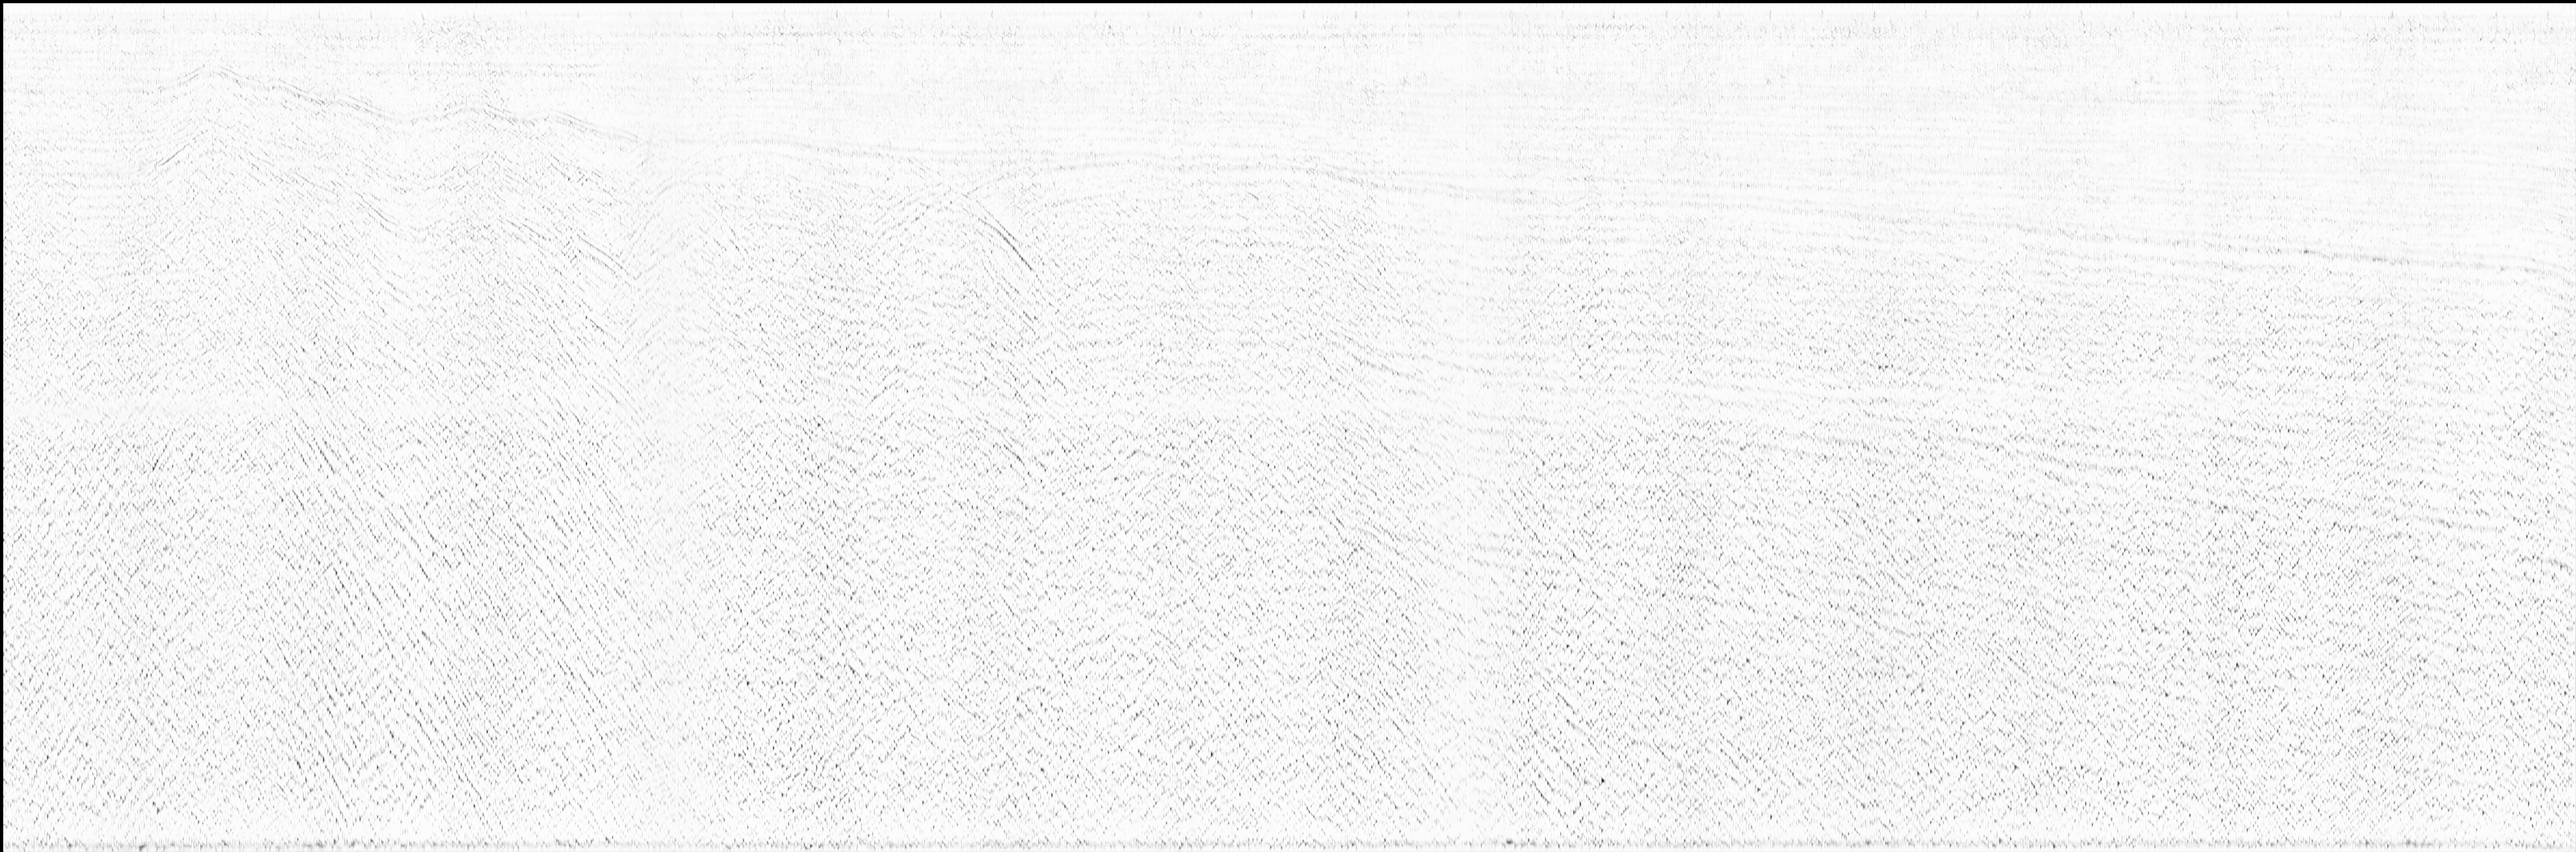

In [47]:
procim=Image.fromarray((proc_image*255.).astype(np.uint8))
procim

(array([2.657000e+04, 7.000000e+00, 1.860000e+02, 1.528000e+03,
        5.797000e+03, 1.479900e+04, 3.283800e+04, 9.648800e+04,
        3.627740e+05, 4.743047e+06]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <BarContainer object of 10 artists>)

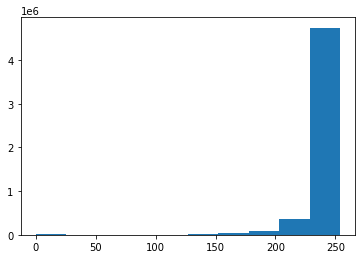

In [48]:
mproc_image=(proc_image*255.).astype(np.uint8)
plt.hist(mproc_image.ravel())

In [49]:
thresh=np.mean(mproc_image)
mproc_image[mproc_image>thresh]=255
mproc_image[mproc_image<thresh]=0
procim=Image.fromarray(mproc_image)

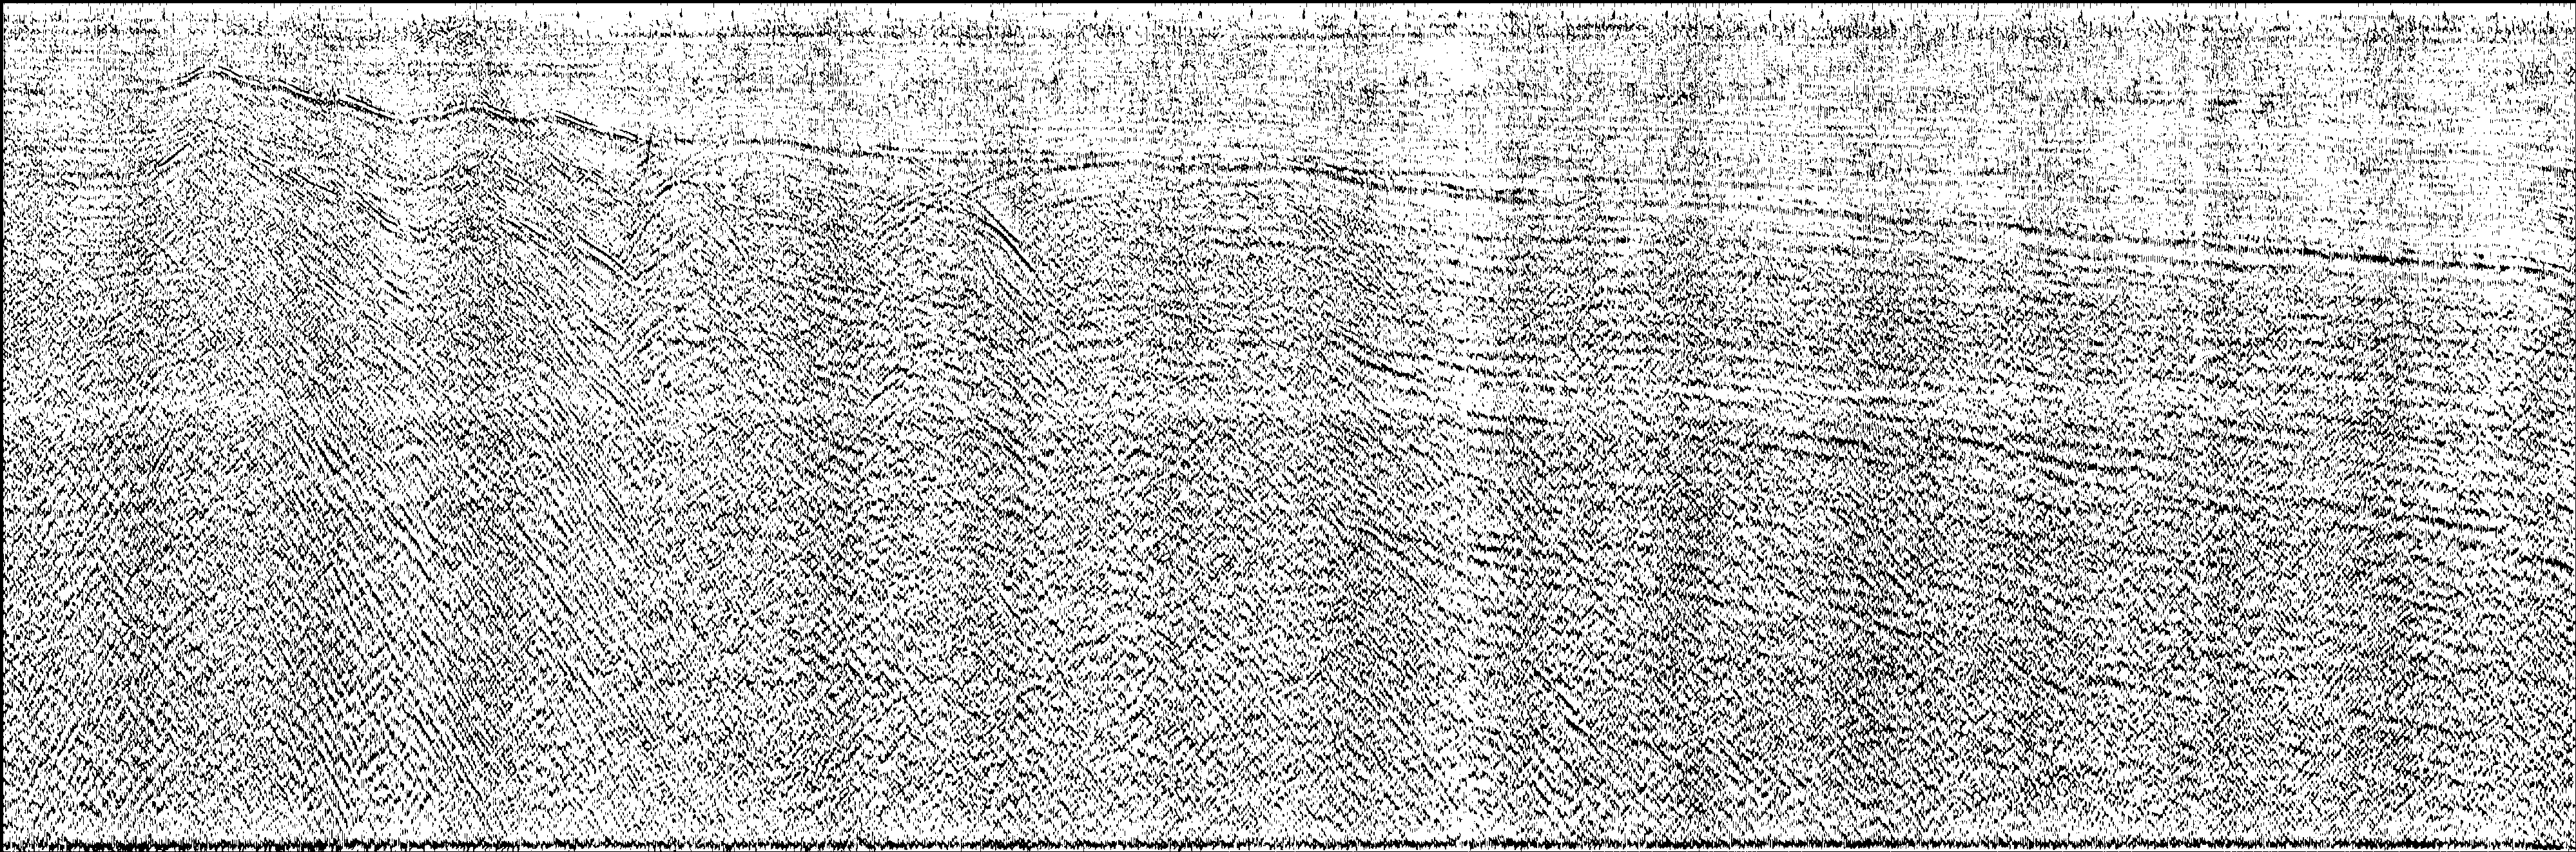

In [50]:
procim

In [51]:
# cleanfolder+imfile
destfolder=r'D:\Ameyem\Bhugarbho\JOGMEC\SeismicSection\Vietnam\cropped\cleaned\\'

# procim.save(cleanfolder+imfile)
procim.save(destfolder+imfile)
# datafolder=r'D:\Ameyem\Bhugarbho\JOGMEC\SeismicSection\Vietnam\cropped\\'
# cimg.save(datafolder+imfile)

In [16]:
datafolder=r'D:\Ameyem\Bhugarbho\JOGMEC\SeismicSection\Vietnam\cropped\\'
import os
files=os.listdir(datafolder)
X_test_noisy=getrandomCrops(datafolder,files[0],input_imsize=(320,320),nims=4)
X_test_noisy.shape

(4, 320, 320)

IndexError: index 4 is out of bounds for axis 0 with size 4

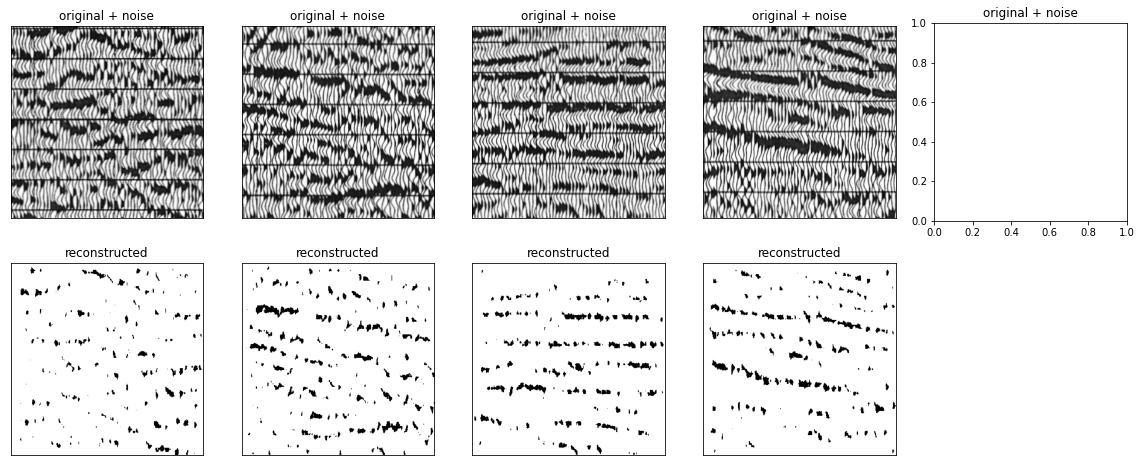

In [17]:
encoded_imgs = autoencoder.encoder(X_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 5
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(X_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()